In [1]:
import pandas as pd 
import numpy as np 
import yfinance as yf
import matplotlib.pyplot as plt 
import datetime
import seaborn as sns

# Download an manipulat the Data 

In [2]:
# Downloading assets data using yfinance library

Assets = ['ACGL','GE','IBM','AAPL','TSLA','JPM'] # You can modifie this liste and add what ever asset you want 
end = datetime.date.today()
start = end - datetime.timedelta(360*5) # we are going to study 5 years data 
df = yf.download(Assets, start = start , end = end )
df.tail()

[*********************100%***********************]  6 of 6 completed


Adj Close                                                 \
                  AAPL       ACGL          GE         IBM         JPM   
Date                                                                    
2023-08-01  195.610001  77.099998  113.220001  143.330002  157.179993   
2023-08-02  192.580002  77.360001  111.970001  144.169998  155.399994   
2023-08-03  191.169998  77.389999  112.360001  144.449997  156.350006   
2023-08-04  181.990005  76.720001  113.059998  144.240005  156.020004   
2023-08-07  178.850006  78.230003  114.730003  146.179993  156.759995   

                             Close                                     ...  \
                  TSLA        AAPL       ACGL          GE         IBM  ...   
Date                                                                   ...   
2023-08-01  261.070007  195.610001  77.099998  113.220001  143.330002  ...   
2023-08-02  254.110001  192.580002  77.360001  111.970001  144.169998  ...   
2023-08-03  259.320007  191.169998  77.389999  112.360001  144.449997  ...   
2023-08-04  253.860001  181.990005  76.720001  113.059998  144.240005  ...   
2023-08-07  251.449997  178.850006  78.230003  114.730003  146.179993  ...   

                  Open                                         Volume  \
                    GE         IBM         JPM        TSLA       AAPL   
Date                                                                    
2023-08-01  113.690002  144.250000  157.429993  266.260010   35175100   
2023-08-02  112.970001  142.779999  155.559998  255.570007   50389300   
2023-08-03  111.830002  143.779999  155.000000  252.039993   61235200   
2023-08-04  112.820000  145.089996  156.399994  260.970001  115799700   
2023-08-07  113.540001  145.000000  156.600006  251.449997   97455200   

                                                           
               ACGL       GE      IBM      JPM       TSLA  
Date                                                       
2023-08-01  1462400  5263400  4797700  6853900   83166000  
2023-08-02  1495300  4291600  4957400  8299400  101752900  
2023-08-03  1815700  3469600  3951900  6084000   97569100  
2023-08-04  1582100  4882100  4223100  6206600   99242600  
2023-08-07  1570500  3303500  3437700  7250700  110939500  

[5 rows x 36 columns]

In [3]:
# All what we need is the Adjusted Close to calculat the daily returns

df = df['Adj Close']
df = df.pct_change().dropna()
df

,AAPL,ACGL,GE,IBM,JPM,TSLA
Date,,,,,,
2018-09-05,-0.006525,0.000000,-0.008682,0.006727,-0.004863,-0.028413
2018-09-06,-0.016617,-0.007519,-0.003981,-0.001841,-0.004276,0.000748
2018-09-07,-0.008068,-0.002635,-0.008793,-0.006421,0.001928,-0.063036
2018-09-10,-0.013421,-0.006605,0.008871,0.001375,-0.005336,0.084562
2018-09-11,0.025283,0.004987,-0.014388,0.005767,0.006332,-0.021226
...,...,...,...,...,...,...
2023-08-01,-0.004276,-0.007594,-0.008929,-0.005895,-0.004938,-0.023782
2023-08-02,-0.015490,0.003372,-0.011040,0.005861,-0.011325,-0.026660
2023-08-03,-0.007322,0.000388,0.003483,0.001942,0.006113,0.020503


# Calculating the statistics 

In [4]:
# calculating the expected returns which is the return's mean
expRet = np.array(df.mean())
N = len(df)
# calculating the standard diviation
stdDev = np.array(np.std(df))
# calculating the Sharp Ratio
sharp = expRet/stdDev
expRet, stdDev,N, sharp

(array([0.00117933, 0.00097875, 0.00072638, 0.00037557, 0.00057908,
        0.00294872]),
 array([0.02109293, 0.02090835, 0.02724439, 0.01711801, 0.02040866,
        0.04176503]),
 1238,
 array([0.05591134, 0.0468115 , 0.02666157, 0.02193976, 0.0283742 ,
        0.07060273]))

In [5]:
# variance covariance Matrix
varCov = np.matmul(np.array(df).T, np.array(df))/(N-1)
varCov

array([[0.00044666, 0.00018301, 0.00021627, 0.00016448, 0.00020084,
        0.0004266 ],
       [0.00018301, 0.00043847, 0.00028718, 0.00019276, 0.00029126,
        0.00017696],
       [0.00021627, 0.00028718, 0.00074339, 0.00023109, 0.00033401,
        0.00026954],
       [0.00016448, 0.00019276, 0.00023109, 0.0002934 , 0.00020673,
        0.00014759],
       [0.00020084, 0.00029126, 0.00033401, 0.00020673, 0.00041719,
        0.00023712],
       [0.0004266 , 0.00017696, 0.00026954, 0.00014759, 0.00023712,
        0.00175443]])

In [6]:
# variance to check if the varcov is correct 
var = stdDev**2
var

array([0.00044491, 0.00043716, 0.00074226, 0.00029303, 0.00041651,
       0.00174432])

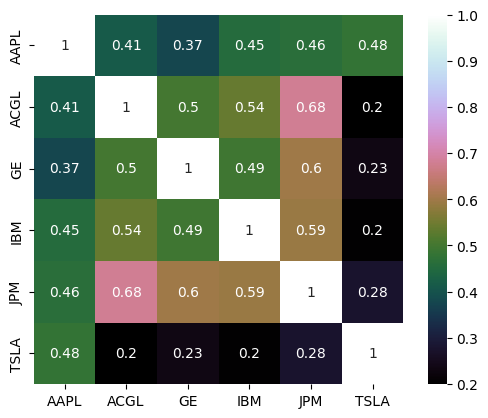

In [7]:
# calculat and plot the correlation between assets
sns.heatmap(df.corr(), vmax=1, square=True, annot=True, cmap='cubehelix')
plt.show()

# Constructing an equaly wieghted portfolio

In [8]:
# calculating the wieghts 
wieghts = np.array(len(df.columns) * [1/len(df.columns)])
wieghts

array([0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
       0.16666667])

In [9]:
# calculating portfolio expected return
portfolio_expRet = np.dot(expRet,wieghts)
portfolio_expRet

0.0011313053963421529

In [10]:
# calculating portfolio standars diviation
portfolio_stdDev = np.sqrt(np.matmul(np.matmul(wieghts,varCov),wieghts.T))
portfolio_stdDev

0.017657574549185248

In [11]:
# calculating portfolio Sharp Ratio
portfolio_sharp = portfolio_expRet / portfolio_stdDev
portfolio_sharp

0.06406912756850591

# Efficient Frontiers

In [12]:
# Proceding a Monte carlo simulation to get a random portfolio wieghts
rand_expRet = []
rand_stdDev = []
rand_wieghts = []
for i in range(100000): # we goes with 100000 random portfolio 
    coefs = np.random.rand(len(df.columns))
    total = np.sum(coefs)
    wieghts = coefs/total
    # adding the whieghts,expected returns and std deviation to lists 
    rand_wieghts.append(wieghts)
    rand_expRet.append(np.dot(expRet,wieghts))
    rand_stdDev.append(np.sqrt(np.matmul(np.matmul(wieghts,varCov),wieghts.T)))

In [13]:
len(rand_expRet)

100000

In [14]:
# Create a Pandas dataframe with the calculated data
data = pd.DataFrame()
data['wieghts']=rand_wieghts
data['return']=rand_expRet
data['std']=rand_stdDev
data['sharp'] = data['return']/data['std']
max_sharp = data[data['sharp']==max(data['sharp'])]
data.head()

,wieghts,return,std,sharp
0,"[0.2277390369600944, 0.11178964253706751, 0.21...",0.001624,0.022176,0.073245
1,"[0.20918172629041548, 0.13550757174439557, 0.0...",0.001233,0.017938,0.068745
2,"[0.17193723959823637, 0.18855882231752172, 0.0...",0.001232,0.017841,0.069058
3,"[0.10280173750413814, 0.11820705001548398, 0.1...",0.001554,0.021666,0.071735
4,"[0.30792145829241424, 0.08837026469527635, 0.2...",0.000989,0.017146,0.057694


In [15]:
# market capital line 
MCL = pd.DataFrame()
riskFree = 0.04 / 252
ret = float(max_sharp['return'])
std = float(max_sharp['std'])
MCL['wieghts'] = [0,1,2]
MCL['return'] = (MCL['wieghts'] * ret)+((1-MCL['wieghts'])*riskFree)
MCL['std'] = MCL['wieghts'] * std
MCL

,wieghts,return,std
0,0,0.000159,0.000000
1,1,0.001659,0.021149
2,2,0.003158,0.042298


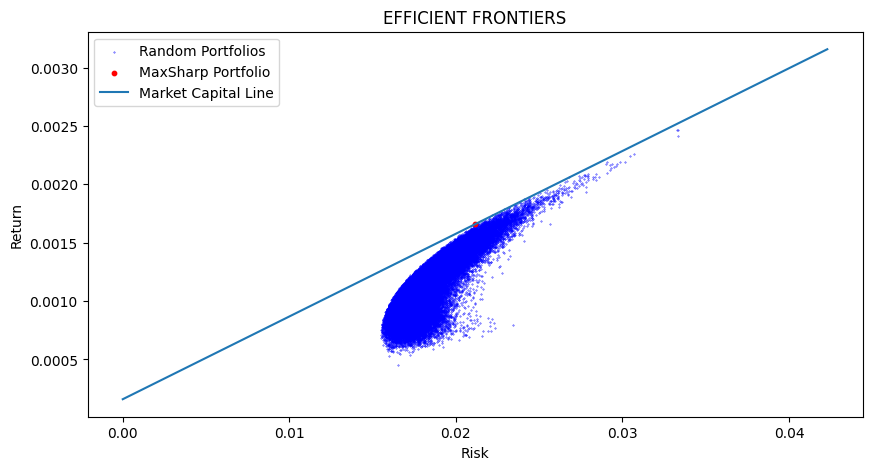

In [16]:
# Ploting all portfolios expected return and standard deviation to get the efficient frontiers 
fig, ax = plt.subplots(figsize=(10, 5))
plt.xlabel("Risk")
plt.ylabel("Return")
plt.title('EFFICIENT FRONTIERS')
random = plt.scatter(data['std'], data['return'], c='b',s=.1)
# the portfolio with max sharp ratio
maxsharp = plt.scatter(max_sharp['std'], max_sharp['return'], c='r',s=10) 
# Market capital line
plt.plot(MCL['std'],MCL['return'])

ax.legend(['Random Portfolios','MaxSharp Portfolio','Market Capital Line'])
plt.show()

In [17]:
# Get th wieghts of the portfolio with the max sharp ratio 
for wieght in max_sharp['wieghts']:
    print(wieght)
print(df.columns)

[0.21243037 0.42889823 0.01060568 0.01624502 0.00170008 0.33012062]
Index(['AAPL', 'ACGL', 'GE', 'IBM', 'JPM', 'TSLA'], dtype='object')
